# Training plots for TSP

In [1]:
from tensorboard.backend.event_processing import event_accumulator
from pprint import pprint
from sys import argv
import matplotlib.pyplot as plt
import numpy as np
import glob

figsize = (8, 5)
dpi = 100

In [6]:
logs = glob.glob('mylogs/**/events.out.*', recursive=True)
names_all = [l.replace('\\','/').split('/')[-2] for l in logs]

pprint(names_all)

eas = []
names = []
for i,l in enumerate(logs):
    ea = event_accumulator.EventAccumulator(l)
    if names_all[i][0] != '_' and 'dist' not in names_all[i]:
        eas.append(ea)
        names.append(names_all[i])

print('============')
pprint(names)

for ea in eas:
    ea.Reload()

['AM_coord',
 'AM_coord_dist',
 'AM_only_dist',
 'AM_seed_42',
 'AM_seed_777',
 'BERT_coord',
 'BERT_seed_42',
 'BERT_seed_777',
 '_BERT_seed_42_20220730T234410',
 '_BERT_seed_42_20220801T095326']
['AM_coord',
 'AM_seed_42',
 'AM_seed_777',
 'BERT_coord',
 'BERT_seed_42',
 'BERT_seed_777']


## Linear scale

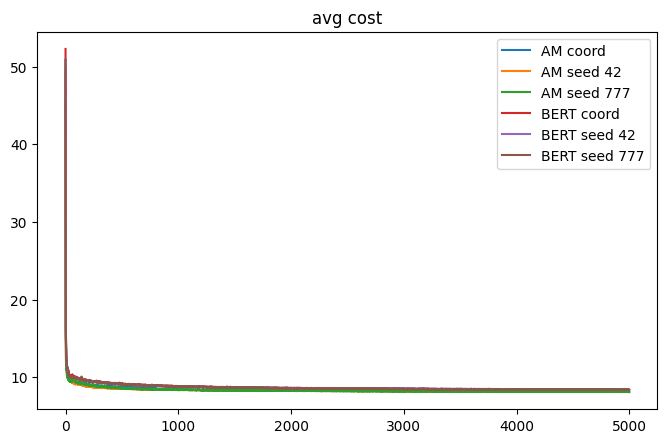

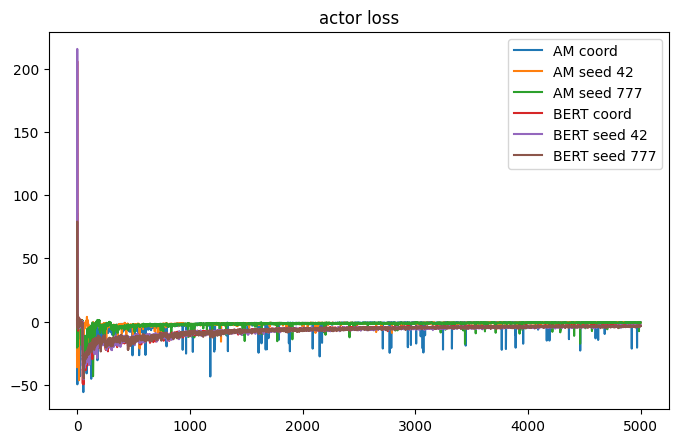

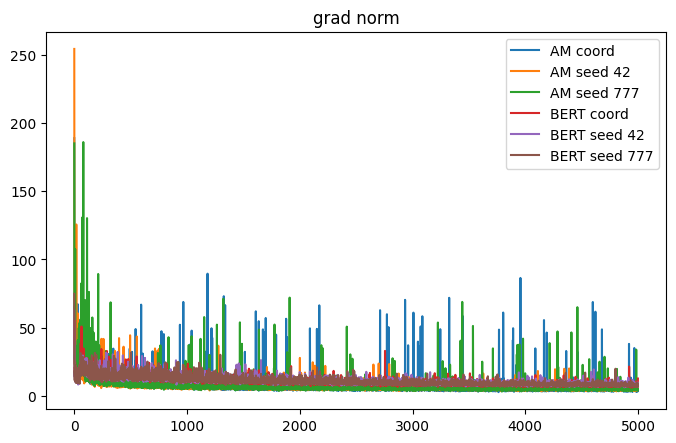

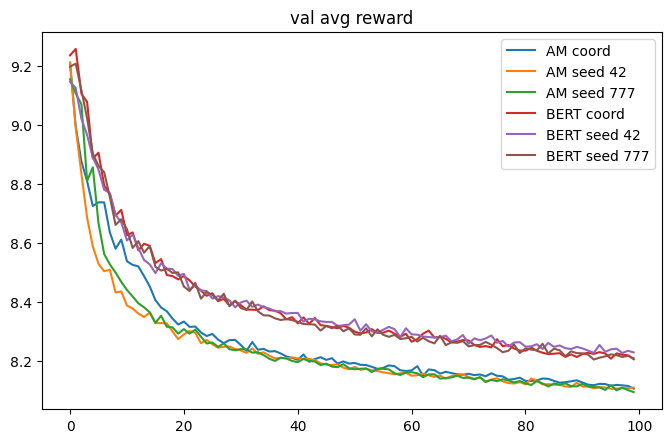

In [7]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '))
        
    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Linear scale (y limited $\mu \pm 3\delta$)

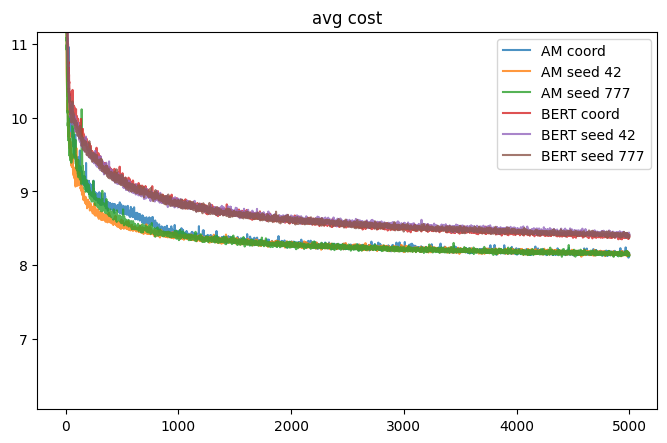

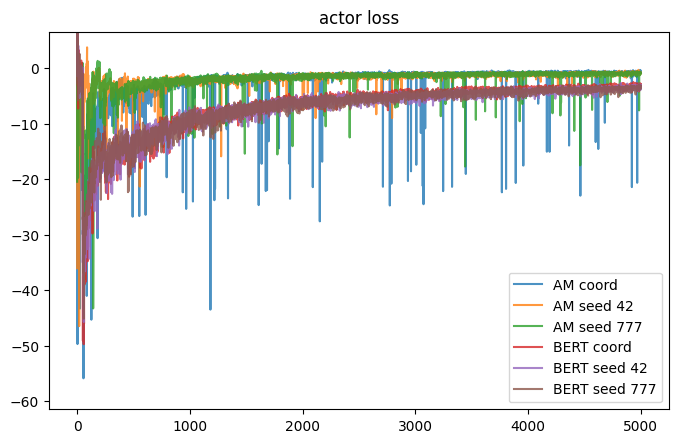

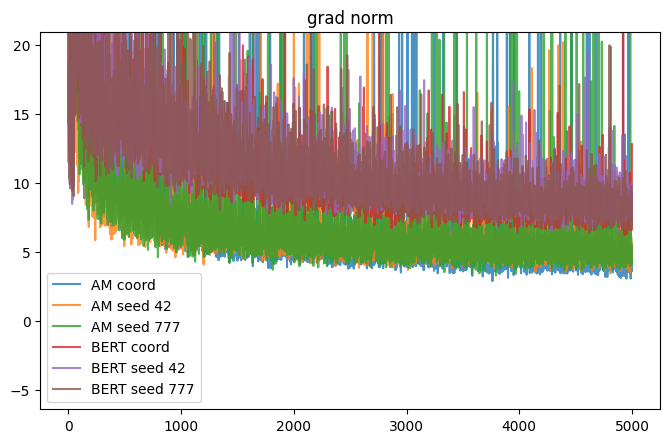

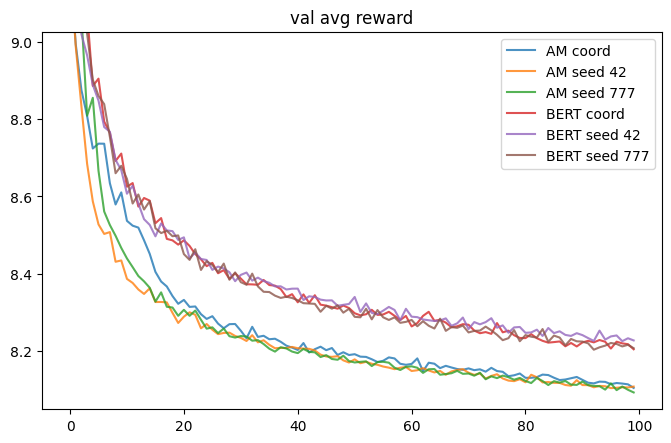

In [4]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '), alpha=0.8)
        
        # reduce y lim with mean +- 2*std
        mean = np.mean(serie)
        std = np.std(serie)
        plt.ylim(top=mean+3*std)

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Log scale

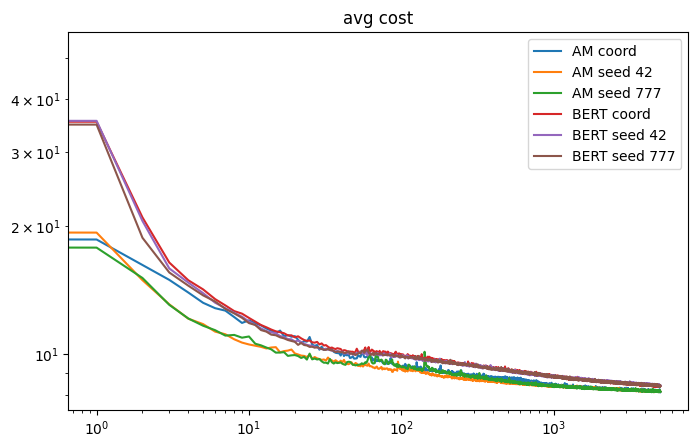

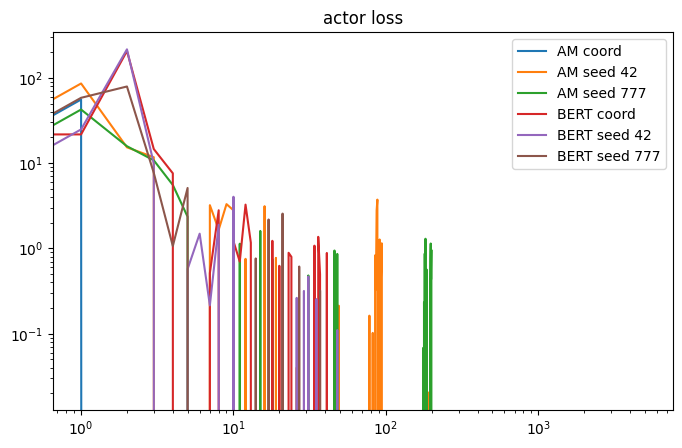

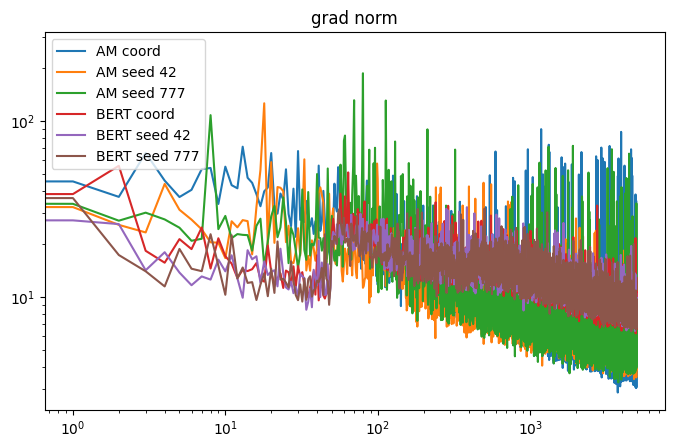

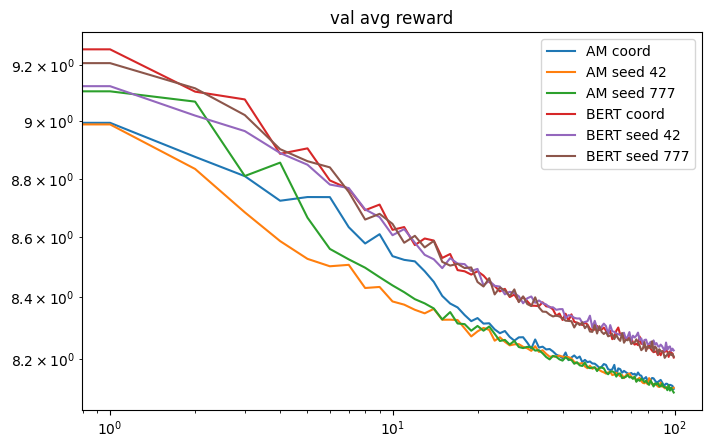

In [5]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)
    ax = plt.gca()

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.loglog(serie, label=names[i].replace('_', ' '))

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()
        